1. Создать приложение ВК (`Лента ВК` ->  `Управление` (левый нижний угол))
2. Зайти в приложение и найти `ID` нового пустого приложения
3. Пройти по ссылке, в которой поменять `CLIENT_ID` на `ID` вашего приложения `https://oauth.vk.com/authorize?client_id=CLIENT_ID&display=page&redirect_uri=https://vk.com/feed&scope=friends&response_type=token&v=5.131&state=123456`
4. Разрешить доступ при редиректе на новую страницу
5. После перехода скопировать все из поля со ссылкой. Там будет что-то такое: 
    `https://api.vk.com/blank.html#access_token=ааааааааааааааа&expires_in=86400&user_id=123789558&state=123456`
    и вытащите значение между строками `access_token=` и `&expires_in`
    

In [1]:
import requests
import networkx
import matplotlib.pyplot as plt 
import time


def get_friends_ids(user_id, access_token):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&access_token={}&v=5.131&fields=country,city' 
    json_response = requests.get(friends_url.format(user_id, access_token)).json()
    if json_response.get('error'):
        print (json_response.get('error'))
        return list()
    return json_response[u'response']

In [2]:
VK_APP_ID: int = ## сюда подставьте ID вас как пользователя (не ID вашего приложения)
ACC_TOKEN: str = ## сюда подставьте access_token, который вы получили из ссылки

In [3]:
friend_ids = get_friends_ids(
    VK_APP_ID, 
    ACC_TOKEN
)

In [4]:
g = networkx.Graph()
g.add_nodes_from([(f["id"], f) for f in friend_ids["items"]])

In [5]:
g.add_edges_from([(VK_APP_ID, i["id"]) for i in friend_ids["items"]])

In [6]:
len(g.nodes)

368

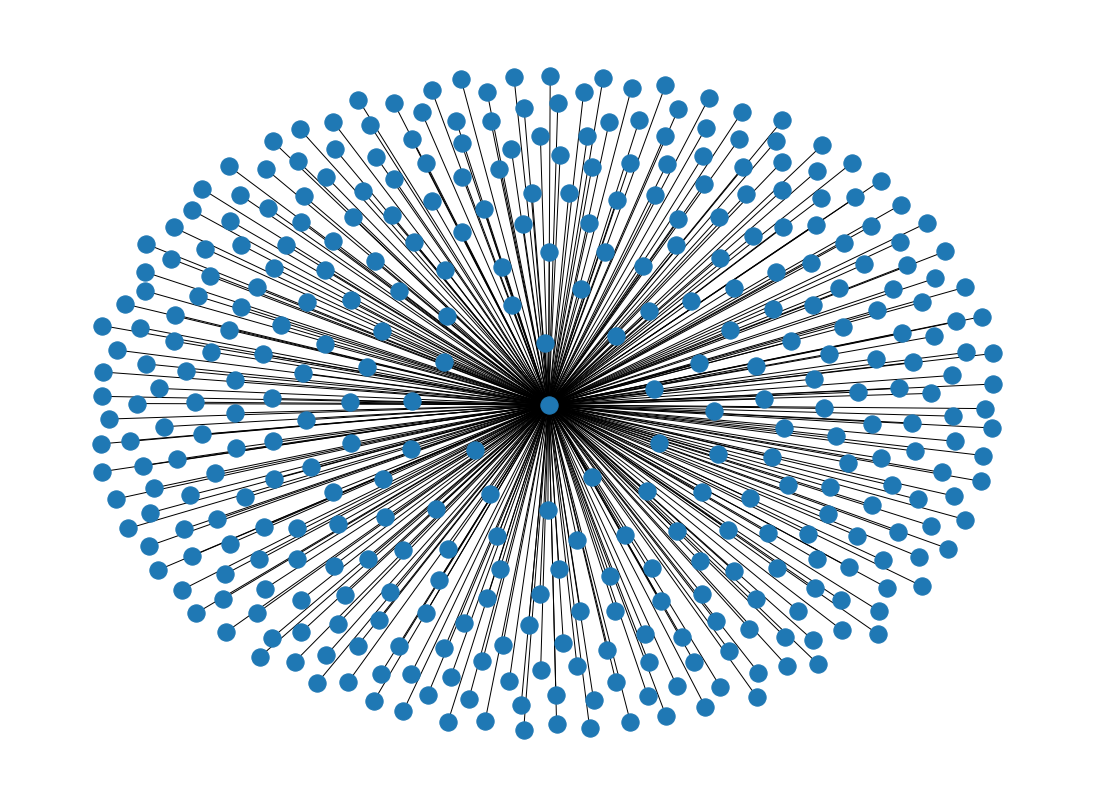

In [7]:
plt.figure(figsize=(15,11))
networkx.draw(g)

In [8]:
networkx.get_node_attributes(g, "city")[9748721]

{'id': 95, 'title': 'Нижний Новгород'}

In [9]:
from tqdm import tqdm
ff_ids = [i["id"] for i in friend_ids["items"]]

for friend in tqdm(friend_ids["items"]):
    friend_id = friend["id"]
    time.sleep(0.22)
    friend_of_friend_ids = get_friends_ids(
        friend_id, 
        ACC_TOKEN
    )
    if isinstance(friend_of_friend_ids, dict):
        for ff in friend_of_friend_ids["items"]:
            ff_id = ff["id"]
            if ff_id in ff_ids:
                g.add_edge(ff_id, friend_id)

 12%|█▏        | 43/367 [00:23<02:15,  2.38it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '24681607'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 15%|█▍        | 55/367 [00:29<02:01,  2.57it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '29261494'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 19%|█▉        | 71/367 [00:36<02:08,  2.30it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '35525847'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 22%|██▏       | 80/367 [00:40<02:15,  2.11it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '43750017'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 27%|██▋       | 100/367 [00:50<01:56,  2.28it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '52004810'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 32%|███▏      | 116/367 [00:57<01:53,  2.20it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '60674547'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 37%|███▋      | 137/367 [01:06<01:48,  2.12it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '74991214'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 47%|████▋     | 174/367 [01:25<01:26,  2.23it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '102673560'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 48%|████▊     | 175/367 [01:25<01:19,  2.41it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '102823575'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 50%|████▉     | 182/367 [01:29<01:35,  1.93it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '111219446'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 56%|█████▋    | 207/367 [01:40<01:08,  2.34it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '132953057'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 63%|██████▎   | 230/367 [01:52<00:55,  2.48it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '145975835'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 70%|██████▉   | 256/367 [02:05<00:53,  2.08it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '170482190'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 70%|███████   | 257/367 [02:05<00:48,  2.28it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '170692762'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 72%|███████▏  | 265/367 [02:09<00:41,  2.48it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '179891449'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 74%|███████▎  | 270/367 [02:11<00:39,  2.44it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '184662792'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 76%|███████▋  | 280/367 [02:15<00:34,  2.54it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '196551281'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 77%|███████▋  | 284/367 [02:17<00:36,  2.28it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '203059608'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 80%|███████▉  | 293/367 [02:21<00:31,  2.33it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '213703793'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 87%|████████▋ | 320/367 [02:35<00:21,  2.21it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '279707826'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 87%|████████▋ | 321/367 [02:36<00:19,  2.37it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '281426334'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 97%|█████████▋| 355/367 [02:52<00:05,  2.24it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '423388837'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


 99%|█████████▊| 362/367 [02:56<00:02,  2.21it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '464967286'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


100%|█████████▉| 366/367 [02:57<00:00,  2.53it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '507580882'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


100%|██████████| 367/367 [02:58<00:00,  2.06it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '522480551'}, {'key': 'v', 'value': '5.131'}, {'key': 'fields', 'value': 'country,city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}


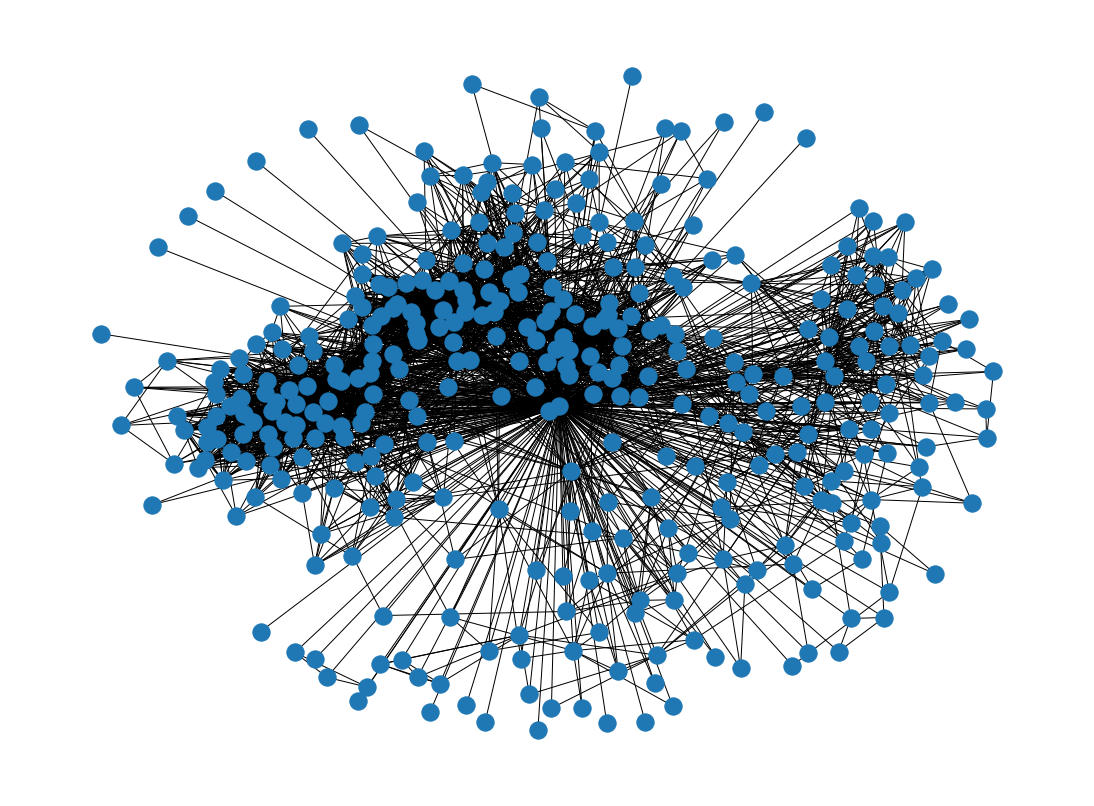

In [11]:
plt.figure(figsize=(15,11))
networkx.draw(g)